# Universe method

by Reece Colclough and Oleg Glotov

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [14]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")


In [15]:
def methodology(stk1, stk2):
    diff = abs(stk1["Adj Close"] - stk2["Adj Close"])

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [16]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2022-09-15"
    end_date = "2024-09-15"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [17]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [18]:
# Download Data

universe = ["AAPL","AAL","AMD","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]
# universe = ["AAPL","AAL","AMD","AMZN",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

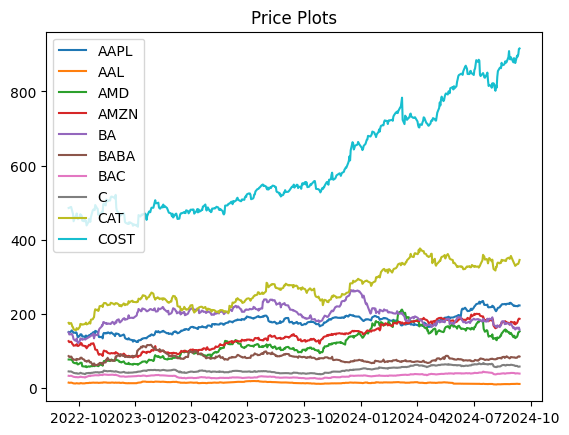

In [19]:
plt.figure()
i = 0
for x in stk_data[:10]:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Price Plots")
plt.savefig('Stock Prices.png', dpi = 1500)
# plt.show()

In [20]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.1972218984999486 -> Conclusion: likely has a trend
AAPLAMD
ADF test: p-val= 0.3674859845222139 -> Conclusion: likely has a trend
AAPLAMZN
ADF test: p-val= 0.10740491835844523 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.1607805239464818 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.11754909243775408 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.2582146345897751 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.34314760400341654 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.27741250808256945 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.42679163233783124 -> Conclusion: likely has a trend
AAPLCSCO
ADF test: p-val= 0.13260386417518039 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.34279511309943056 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.5427308795165549 -> Conclusion: likely has a trend
AAPLDLR
ADF test: p-val= 0.2700070884476274 -> Conclusio

In [21]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum),dpi=250)
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")

plt.savefig('HeatMap.png')
plt.show()

In [22]:
data

array([[1.        , 0.1972219 , 0.36748598, ..., 0.14416362, 0.46875848,
        0.17230084],
       [0.1972219 , 1.        , 0.13474795, ..., 0.04067797, 0.4300414 ,
        0.05877627],
       [0.36748598, 0.13474795, 1.        , ..., 0.18584816, 0.16863861,
        0.11697118],
       ...,
       [0.14416362, 0.04067797, 0.18584816, ..., 1.        , 0.11367623,
        0.11984649],
       [0.46875848, 0.4300414 , 0.16863861, ..., 0.11367623, 1.        ,
        0.44704193],
       [0.17230084, 0.05877627, 0.11697118, ..., 0.11984649, 0.44704193,
        1.        ]])

In [23]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMZN        BA      BABA       BAC   
0   1.000000  0.197222  0.367486  0.107405  0.160781  0.117549  0.258215  \
1   0.197222  1.000000  0.134748  0.006388  0.400167  0.112349  0.464188   
2   0.367486  0.134748  1.000000  0.014868  0.115324  0.316982  0.213092   
3   0.107405  0.006388  0.014868  1.000000  0.088003  0.075815  0.009499   
4   0.160781  0.400167  0.115324  0.088003  1.000000  0.461405  0.473498   
5   0.117549  0.112349  0.316982  0.075815  0.461405  1.000000  0.055761   
6   0.258215  0.464188  0.213092  0.009499  0.473498  0.055761  1.000000   
7   0.343148  0.302463  0.159628  0.014428  0.428416  0.201319  0.271390   
8   0.277413  0.189693  0.084383  0.048997  0.485604  0.192670  0.160715   
9   0.426792  0.278151  0.710425  0.509761  0.476318  0.261666  0.235750   
10  0.132604  0.093552  0.176716  0.014476  0.406278  0.030591  0.347314   
11  0.342795  0.031601  0.032022  0.115910  0.311887  0.069388  0.013018   
1

In [24]:
print(sol)
print()
n = 30
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0      INTC      KO  0.958413
1       IBM    INTC  0.950830
2       LMT     MPC  0.944690
3      INTC     LMT  0.923558
4       LMT    LULU  0.919391
..      ...     ...       ...
898     JPM    NVDA  0.001059
899     AMD    META  0.000942
900    AMZN     MRK  0.000212
901     DIS     MRK  0.000163
902     CVX     JNJ  0.000016

[903 rows x 3 columns]

last 30 rows

    level_0 level_1         0
873     DLR    SCHW  0.004563
874   GOOGL     MRK  0.004482
875     DLR       F  0.004336
876   GOOGL     XOM  0.004223
877    META     MRK  0.003976
878    META     MPC  0.003945
879     DLR     JNJ  0.003868
880     AMD   GOOGL  0.003571
881     DLR      VZ  0.003542
882     AAL     DLR  0.003374
883     MRK      WM  0.003359
884     DLR     WFC  0.003292
885     DLR     PFE  0.003279
886     DLR     MRK  0.003222
887     DIS     NKE  0.003211
888     AMD     MPC  0.003041
889    AMZN     WFC  0.002936
890     DLR     XOM  0.002647
891     BAC     DLR  0.001770
8